<img src="../../../img/logo-bdc.png" align="right" width="64"/>

# <span style="color:#336699; text-align:center">Introduction to the Python Client Library for Sample Database (sample.py)</span>
<hr style="border:2px solid #0077b9;">

<div style=text-align: left;>
    <a href="https://nbviewer.jupyter.org/github/brazil-data-cube/code-gallery/blob/master/jupyter/Python/wlts/wlts-introduction.ipynb"><img src="https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg" align="center"/></a>
</div>

<div style="text-align: center;font-size: 90%;">
    Fabiana Zioti<sup><a href="https://orcid.org/0000-0002-7305-6043"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>, Karine Reis Ferreira<sup><a href="https://orcid.org/0000-0003-2656-5504"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>, Gilberto R. Queiroz<sup><a href="https://orcid.org/0000-0001-7534-0219"><i class="fab fa-lg fa-orcid" style="color: #a6ce39"></i></a></sup>
    <br/><br/>
    Earth Observation and Geoinformatics Division, National Institute for Space Research (INPE)
    <br/>
    Avenida dos Astronautas, 1758, Jardim da Granja, São José dos Campos, SP 12227-010, Brazil
    <br/><br/>
    Contact: <a href="mailto:brazildatacube@inpe.br">brazildatacube@inpe.br</a>
    <br/><br/>
    Last Update: April 30, 2021
</div>

<br/>

<div style="text-align: justify;  margin-left: 25%; margin-right: 25%;">
<b>Abstract.</b> This Jupyter Notebook gives an overview on how to use sample.py to discover and access land use and cover classification samples.
</div>   


# Introduction
<hr style="border:1px solid #0077b9;">

Sample-DB provides a data model that represents the land use and cover samples collected by different projects and individuals. This model can be see in `Figure 1`.

<br>
<center>
    <img src="../../../img/sample/db-schema.png" width="850" heigh="700" />,
    <br/>
    <b>Figure 1</b> - Sample-DB Model.
</center>
</r>

To facilitate access to samples of land use and land cover stored in the database, a Python package called ``SAMPLE.py`` was developed. This package retrieves the land use and land cover samples that were made available via ``WFS`` by the GeoServer application.

This Jupyter Notebook shows how to use the [Python Client Library](https://github.com/brazil-data-cube/sample.py) for Sample Database Model.


# Python Client API
<hr style="border:1px solid #0077b9;">

For running the examples in this Jupyter Notebook you will need to install the [Sample client for Python](https://github.com/brazil-data-cube/sample.py).To install it from pip, use the following command:

In [ ]:
# !pip install git+https://github.com/brazil-data-cube/sample.py@v0.8.0

In order to access the funcionalities of the client API, you should import the `sample` package, as follows:

In [1]:
import sample

After that, you can check the installed version of sample package:

In [2]:
sample.__version__

'0.8.0'

Sample is a client-server service. In this tutorial, we will use the Python client to access the data. We need to define the URL where the SAMPLE.py ``WFS`` server is operating. The code below defines the URL of Geoserver application of Brazil Data Cube. 

You should create a sample object attached to a given WFS. If necessary, a username and password must be provided.
``Sample.py`` is integrated with [Python Cliente for LCCS-WS](https://github.com/brazil-data-cube/lccs.py). In this way, a URL for an LCCS instance must be informed. By default, sample.py uses the ``https://brazildatacube.dpi.inpe.br/dev/lccs``, but if you want to use another instance, this must be reported as the sample object in ``lccs='LCCS-URL'``.


In [7]:
service = sample.SAMPLE(url='http://127.0.0.1:5001/', access_token='24gd5YIo2UyeDBNFSRG4DGV5VVVjuGIuPUVoU08Kuh')

> If desired, you can pass other LCCS-WS server addresses 

> service = sample.SAMPLE(url='http://127.0.0.1:5001/', access_token='change-me', 
> lccs='https://url/to/other/lccs')

The above cell will create an object named `service` that will allow us to comunicate to the given WFS service.

# Listing the Available Datasets
<hr style="border:1px solid #0077b9;">

In the Jupyter environment, the SAMPLE object will list the available datasets from the service:

In [8]:
service

sample(url="http://127.0.0.1:5001")

Or you can access the ``datasets`` property, which returns a list of available datasets:

In [5]:
service.datasets

[{'id': 3, 'name': 'terra-collect-bdc-coleta-teste-teste', 'version': '1'},
 {'id': 7, 'name': 'terra-collect-bdc-dd-cc-dd', 'version': '1'},
 {'id': 8, 'name': 'terra-collect-bdc-dd-cc-dd', 'version': '2'},
 {'id': 13, 'name': 'teste-system', 'version': '1'},
 {'id': 6, 'name': 'terra-collect-bdc-dd-cc', 'version': '1'},
 {'id': 15, 'name': 'teste-project-update', 'version': '1'},
 {'id': 14, 'name': 'bdc-samples-teste-rename', 'version': '6'},
 {'id': 16, 'name': 'bdc-samples-cerrado-t', 'version': '1'},
 {'id': 17, 'name': 'bdc-coleta-teste-up', 'version': '1'},
 {'id': 18, 'name': 'fabi-cerrado-2020', 'version': '1'},
 {'id': 19, 'name': 'segunda-coleta', 'version': '1'},
 {'id': 20, 'name': 'segunda-coleta-dois', 'version': '1'},
 {'id': 21, 'name': 'segunda-coleta-dois-teste', 'version': '1'},
 {'id': 22, 'name': 'segunda-coleta-dois-testet', 'version': '1'},
 {'id': 23, 'name': 'segunda-coleta-dois-testetd', 'version': '1'},
 {'id': 24, 'name': 'sddegunda-coleta', 'version': '1'

> In the SAMPLE Python client, the list of datasets is composed by the ``name`` and ``version`` of a dataset, separated by a hyphen and ``V``. For example, the ``bdc-go-test-area`` dataset, version ``1``, is listed in this operation as ``bdc-go-test-area-V1``. These identifiers can be used in other operations.

# Retrieving the Metadata of a Dataset
<hr style="border:1px solid #0077b9;">

It is possible to access a specific dataset with the operator[]:

In [9]:
ds = service.dataset(dataset_name='bdc-go-test-area', dataset_version='1')
ds

{'classification_system_id': 1,
 'classification_system_name': 'BDC',
 'classification_system_version': '1.0',
 'collect_method_id': 2,
 'collect_method_name': 'VISUAL',
 'dataset_table_id': 648621,
 'description': 'Brazil Data Cube samples of study areas',
 'end_date': '2019-08-31T00:00:00Z',
 'id': 4,
 'is_public': True,
 'metadata_json': {'agency': 'INPE',
  'contributors': [{'@type': 'Person',
    'familyName': 'Picoli',
    'givenName': 'Michelle'},
   {'@type': 'Person', 'familyName': 'Simoes', 'givenName': 'Rolf'},
   {'@type': 'Person', 'familyName': 'Chaves', 'givenName': 'Michel'}],
  'creators': [{'@type': 'Person',
    'familyName': 'Picoli',
    'givenName': 'Michelle'},
   {'@type': 'Person', 'familyName': 'Simoes', 'givenName': 'Rolf'},
   {'@type': 'Person', 'familyName': 'Chaves', 'givenName': 'Michel'}],
  'dates': [{'date': '2019', 'dateType': 'Issued'}],
  'descriptions': [{'description': 'This dataset include samples for the one tile in Goias of the test sites used by the Brazilian Data Cube project.',
    'descriptionType': 'Abstract',
    'lang': 'en'}],
  'formats': [],
  'fundingReferences': [{'awardNumber': '17.2.0536.1',
    'awardTitle': 'Brazil Data Cube project',
    'funderName': 'Amazon Fund through the financial collaboration of the Brazilian Development Bank (BNDES), and the Foundation for Science, Technology and Space Applications (FUNCATE) (process number 17.2.0536.1, Brazil Data Cube project)'},
   {'awardNumber': '88887.351470/2019-00',
    'funderName': 'Coordination for the Improvement of Higher Education Personnel (CAPES) (process number 88887.351470/2019-00)'}],
  'geoLocations': [],
  'id': 'area_bdc_go',
  'language': 'en',
  'rightsList': [{'rights': 'Creative Commons Attribution 4.0 International',
    'rightsUri': 'https://creativecommons.org/licenses/by/4.0/'}],
  'schemaVersion': 'http://datacite.org/schema/kernel-4',
  'sizes': [],
  'state': 'findable',
  'subjects': [{'lang': 'en', 'subject': 'Brazil Data Cube'},
   {'lang': 'en', 'subject': 'sutdy areas'},
   {'lang': 'en', 'subject': 'Cerrado'},
   {'lang': 'en', 'subject': 'Goias'}],
  'titles': [{'lang': 'en',
    'title': 'Brazil Data Cube samples of study areas'}],
  'types': {'bibtex': 'misc',
   'citeproc': 'dataset',
   'resourceType': 'Dataset',
   'resourceTypeGeneral': 'Dataset',
   'ris': 'DATA',
   'schemaOrg': 'Dataset'},
  'version': '1.0'},
 'name': 'bdc-go-test-area',
 'number_of_features': 702,
 'start_date': '2018-09-01T00:00:00Z',
 'title': 'Brazil Data Cube Goias Test Area',
 'user_id': 1,
 'version': '1',
 'version_predecessor': None,
 'version_successor': None}

Let's inspect the metadata:

In [10]:
ds.metadata

{'agency': 'INPE',
 'contributors': [{'@type': 'Person',
   'familyName': 'Picoli',
   'givenName': 'Michelle'},
  {'@type': 'Person', 'familyName': 'Simoes', 'givenName': 'Rolf'},
  {'@type': 'Person', 'familyName': 'Chaves', 'givenName': 'Michel'}],
 'creators': [{'@type': 'Person',
   'familyName': 'Picoli',
   'givenName': 'Michelle'},
  {'@type': 'Person', 'familyName': 'Simoes', 'givenName': 'Rolf'},
  {'@type': 'Person', 'familyName': 'Chaves', 'givenName': 'Michel'}],
 'dates': [{'date': '2019', 'dateType': 'Issued'}],
 'descriptions': [{'description': 'This dataset include samples for the one tile in Goias of the test sites used by the Brazilian Data Cube project.',
   'descriptionType': 'Abstract',
   'lang': 'en'}],
 'formats': [],
 'fundingReferences': [{'awardNumber': '17.2.0536.1',
   'awardTitle': 'Brazil Data Cube project',
   'funderName': 'Amazon Fund through the financial collaboration of the Brazilian Development Bank (BNDES), and the Foundation for Science, Technology and Space Applications (FUNCATE) (process number 17.2.0536.1, Brazil Data Cube project)'},
  {'awardNumber': '88887.351470/2019-00',
   'funderName': 'Coordination for the Improvement of Higher Education Personnel (CAPES) (process number 88887.351470/2019-00)'}],
 'geoLocations': [],
 'id': 'area_bdc_go',
 'language': 'en',
 'rightsList': [{'rights': 'Creative Commons Attribution 4.0 International',
   'rightsUri': 'https://creativecommons.org/licenses/by/4.0/'}],
 'schemaVersion': 'http://datacite.org/schema/kernel-4',
 'sizes': [],
 'state': 'findable',
 'subjects': [{'lang': 'en', 'subject': 'Brazil Data Cube'},
  {'lang': 'en', 'subject': 'sutdy areas'},
  {'lang': 'en', 'subject': 'Cerrado'},
  {'lang': 'en', 'subject': 'Goias'}],
 'titles': [{'lang': 'en',
   'title': 'Brazil Data Cube samples of study areas'}],
 'types': {'bibtex': 'misc',
  'citeproc': 'dataset',
  'resourceType': 'Dataset',
  'resourceTypeGeneral': 'Dataset',
  'ris': 'DATA',
  'schemaOrg': 'Dataset'},
 'version': '1.0'}

# Retrieving the data
<hr style="border:1px solid #0077b9;">

In order to retrieve the data (observations) of a dataset, use the the method ``.data``. This will return the data in a ``GeoPandas``.

In [11]:
bdc_obs = ds.data()

In [12]:
# This function returns the first n rows of bdc_obs
bdc_obs.head()

,geometry,class_id,class_name,collection_date,created_at,end_date,id,start_date,updated_at,user_id
0,POINT (-49.82712 -17.71317),24,Agriculture,None,None,2019-08-31T00:00:00Z,1,2018-09-01T00:00:00Z,None,1
1,POINT (-51.32955 -17.23380),24,Agriculture,None,None,2019-08-31T00:00:00Z,2,2018-09-01T00:00:00Z,None,1
2,POINT (-51.28617 -17.28032),24,Agriculture,None,None,2019-08-31T00:00:00Z,3,2018-09-01T00:00:00Z,None,1
3,POINT (-51.40745 -17.34724),24,Agriculture,None,None,2019-08-31T00:00:00Z,4,2018-09-01T00:00:00Z,None,1
4,POINT (-51.44038 -17.47636),24,Agriculture,None,None,2019-08-31T00:00:00Z,5,2018-09-01T00:00:00Z,None,1


# Visualizing the data
<hr style="border:1px solid #0077b9;">

It is possible to plot the dataset data with the ``plot`` method:

In [ ]:
bdc_obs.plot( marker='o', color='red', markersize=5, figsize=(20, 20));

# Visualizing the data with GeoPandas and others data
<hr style="border:1px solid #0077b9;">

After retrieving dataset data you can use any Python library to perform data processing. In this section we show how to use ``GeoPandas`` to load and use others data. With Pandas installed, import the library:

In [13]:
import geopandas as gpd
from matplotlib import pyplot as plt

You can define a file to import. In this example we use the ``read_file()`` to open a shapefile. Those data can be found in [unidades_da_federacao](http://servicodados.ibge.gov.br/Download/Download.ashx?u=geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2017/Brasil/BR/br_unidades_da_federacao.zip) and [Biomas_250mil](ftp://geoftp.ibge.gov.br/informacoes_ambientais/estudos_ambientais/biomas/vetores/Biomas_250mil.zip)

In [14]:
file_biomas = "https://geoftp.ibge.gov.br/informacoes_ambientais/estudos_ambientais/biomas/vetores/Biomas_250mil.zip"
file_uf = "https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2020/Brasil/BR/BR_UF_2020.zip"

In [15]:
# Load the biomas data of IBGE
biomas = gpd.read_file(file_biomas)

In [16]:
biomas

,Bioma,CD_Bioma,geometry
0,Amazônia,1,"MULTIPOLYGON (((-44.08515 -2.41669, -44.08560 ..."
1,Caatinga,2,"POLYGON ((-41.74080 -2.80826, -41.73673 -2.809..."
2,Cerrado,3,"POLYGON ((-43.39009 -2.33937, -43.38741 -2.342..."
3,Mata Atlântica,4,"MULTIPOLYGON (((-48.70814 -28.44851, -48.70994..."
4,Pampa,5,"POLYGON ((-52.82472 -27.46295, -52.81558 -27.4..."
5,Pantanal,6,"POLYGON ((-57.75946 -15.72779, -57.75659 -15.7..."


In [17]:
uf = gpd.read_file(file_uf)

In [18]:
uf.head()

,CD_UF,NM_UF,SIGLA_UF,NM_REGIAO,geometry
0,11,Rondônia,RO,Norte,"POLYGON ((-65.38150 -10.42907, -65.38013 -10.4..."
1,12,Acre,AC,Norte,"POLYGON ((-71.07772 -9.82774, -71.07817 -9.828..."
2,13,Amazonas,AM,Norte,"POLYGON ((-69.83766 -3.68659, -69.82555 -3.620..."
3,14,Roraima,RR,Norte,"POLYGON ((-63.96008 2.47313, -63.96041 2.47416..."
4,15,Pará,PA,Norte,"MULTIPOLYGON (((-51.43248 -0.47334, -51.42949 ..."


The code below plots ``biomes``, ``federative units`` and ``bdc-ba-test-area-V1`` samples on a single map:

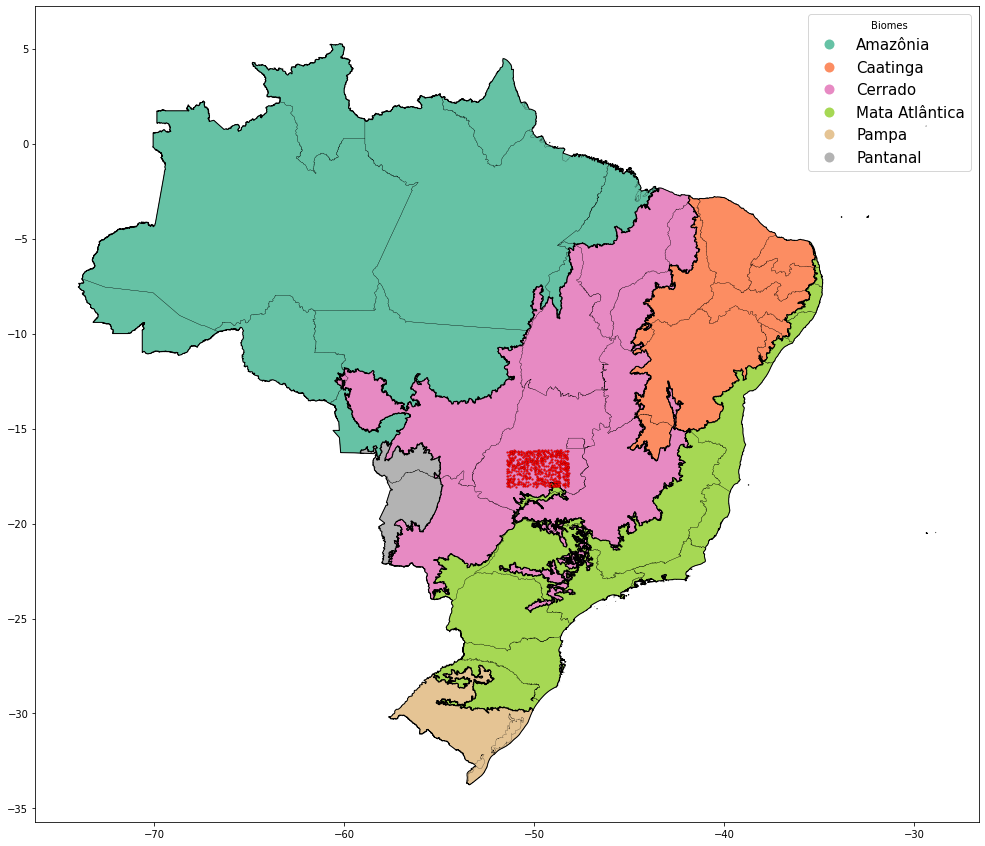

In [19]:
fig, ax = plt.subplots(figsize=(20,15))

biomas.plot(ax=ax, cmap='Set2', column='Bioma',edgecolor='black', legend=True,legend_kwds={'title': "Biomes", 'fontsize': 15})

uf.geometry.boundary.plot(ax=ax, color=None, edgecolor='black',linewidth = 0.2)

bdc_obs.plot(ax=ax, marker='o', color='red', markersize=4, edgecolor='black', linewidth = 0.1);

# Save data to file
<hr style="border:1px solid #0077b9;">

You can save data from a dataset to a ``shapefile`` using the ``.to_file`` method. It is necessary to inform in the parameter path, the directory that you want to save the file and the data. In the example below the data ``bdc_obs`` from the ``bdc-ba-test-area-V1`` dataset is being saved in a shapefile with the name ``my_save_bdc_obs``

In [ ]:
service.save_feature(filename="my_save_bdc_obs.shp", gdf=bdc_obs)